# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [25]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    # Calculate means and standard deviations of each column in X and T

    Xmeans = np.mean(X, axis = 0)
    Xstds = np.std(X, axis = 0)

    Tmeans = np.mean(T, axis = 0)
    Tstds = np.std(T, axis = 0)
   
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans)/Xstds
    #np.mean(X, axis=0), np.std(X,axis=0)

    T = (T - Tmeans) / Tstds
    #np.mean(T, axis=0), np.std(T,axis=0)

    # Insert the column of constant 1's as a new initial column in X

    X1 = np.insert(X,0,1,axis=1)
    n_samples, n_inputs = X1.shape
   
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    rows, cols = T.shape
    w = np.zeros((n_inputs,cols))

    for epoch in range(n_epochs):
        sqerror_sum = 0

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            y = X1[n:n + 1, :] @ w
            error = T[n:n + 1, :] - y
            w += learning_rate * X1[n:n + 1, :].T * error
           
           
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2
           
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [26]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans'])/model['Xstds']
    #np.mean(X, axis=0), np.std(X,axis=0)

    # Predict output values using weights in model
    X1 = np.insert(X,0,1,axis=1)
    predict = X1 @ model['w']
   
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    Y = predict * model['Tstds'] + model['Tmeans']
   
    # Return the unstandardized output values
    return Y

In [4]:
def rmse(A, B):
    # Y = Predictions  :  T = Targets
    return np.sqrt(np.mean((A-B)**2))

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

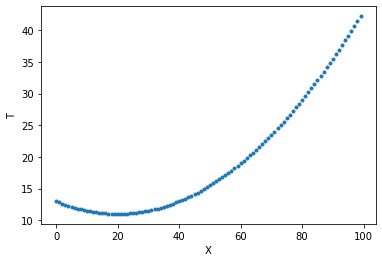

In [5]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [6]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[-0.00576098],
        [ 1.05433338]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

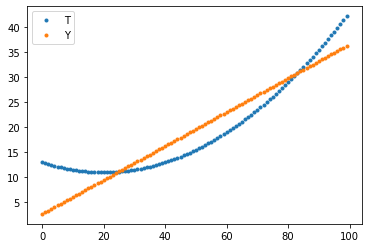

In [7]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

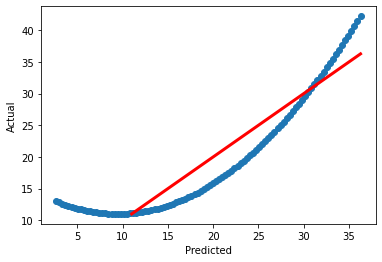

In [8]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [9]:
df = pd.read_csv('A1_data.txt', delim_whitespace=True, na_values="***")
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,st15mx,st15mxtm,st15mn,st15mntm,volts,year,gust,gusttm,gusdir,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,-1.803,00:00,-3.195,23:00,NaN,2019.0,5.155,08:10,NaN,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,-2.941,19:00,-4.802,11:00,NaN,2019.0,4.332,11:50,NaN,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,-1.979,22:00,-4.639,10:00,NaN,2019.0,4.096,15:40,NaN,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,-0.963,23:00,-2.768,10:00,NaN,2019.0,4.096,12:30,NaN,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,-0.350,23:00,-1.401,11:00,NaN,2019.0,4.077,12:20,NaN,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,0.308,06:00,0.257,14:00,NaN,2019.0,4.469,16:00,NaN,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,0.298,20:00,0.264,10:00,NaN,2019.0,10.623,12:20,NaN,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,0.288,00:00,0.219,23:00,NaN,2019.0,11.486,07:10,NaN,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,...,0.200,00:00,-0.150,23:00,NaN,2019.0,4.586,14:30,NaN,0.504


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [10]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [11]:
# Due to the way my code is written this has to come before I can remove the missing values
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [12]:
df = df[Xnames]
df = df.dropna()
df.isna().sum()

tave     0
tmax     0
tmin     0
vp       0
rhmax    0
rhmin    0
pp       0
gust     0
dtype: int64

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [13]:
T_df = df[['tave']][1:]
T = T_df.to_numpy()
X = df.to_numpy()
X = X[:-1]
T.shape, X.shape

((364, 1), (364, 8))

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

Model:1
Epoch 5 RMSE 0.64
Epoch 10 RMSE 0.63
Epoch 15 RMSE 0.63
Epoch 20 RMSE 0.63
Epoch 25 RMSE 0.63
Epoch 30 RMSE 0.63
Epoch 35 RMSE 0.63
Epoch 40 RMSE 0.63
Epoch 45 RMSE 0.63
Epoch 50 RMSE 0.63
rmse 1: 6.329902634399548


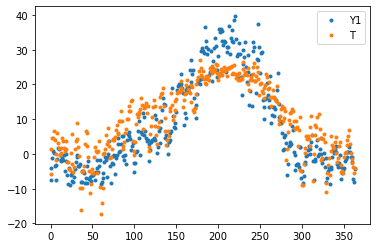


Model:2
Epoch 1 RMSE 0.39
Epoch 2 RMSE 0.34
Epoch 3 RMSE 0.34
Epoch 4 RMSE 0.34
Epoch 5 RMSE 0.34
Epoch 6 RMSE 0.34
Epoch 7 RMSE 0.34
Epoch 8 RMSE 0.34
Epoch 9 RMSE 0.34
Epoch 10 RMSE 0.34
rmse 2: 3.4323503395097554


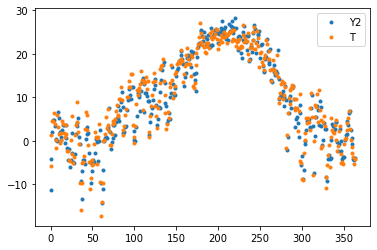


Model:3
Epoch 5 RMSE 0.34
Epoch 10 RMSE 0.33
Epoch 15 RMSE 0.33
Epoch 20 RMSE 0.33
Epoch 25 RMSE 0.33
Epoch 30 RMSE 0.33
Epoch 35 RMSE 0.33
Epoch 40 RMSE 0.33
Epoch 45 RMSE 0.33
Epoch 50 RMSE 0.33
rmse 3: 3.3167191787057084


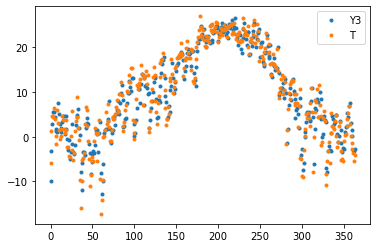


Model:4
Epoch 5 RMSE 0.94
Epoch 10 RMSE 0.89
Epoch 15 RMSE 0.84
Epoch 20 RMSE 0.79
Epoch 25 RMSE 0.74
Epoch 30 RMSE 0.70
Epoch 35 RMSE 0.67
Epoch 40 RMSE 0.63
Epoch 45 RMSE 0.60
Epoch 50 RMSE 0.58
rmse 4: 5.738091145691433


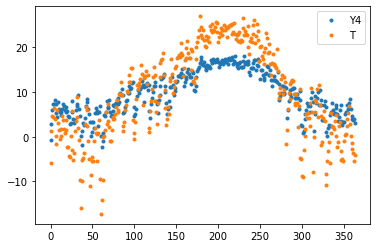


Model:5
Epoch 10 RMSE 1.00
Epoch 20 RMSE 1.00
Epoch 30 RMSE 1.00
Epoch 40 RMSE 0.99
Epoch 50 RMSE 0.99
Epoch 60 RMSE 0.99
Epoch 70 RMSE 0.99
Epoch 80 RMSE 0.99
Epoch 90 RMSE 0.99
Epoch 100 RMSE 0.99
rmse 5: 9.872696517039794


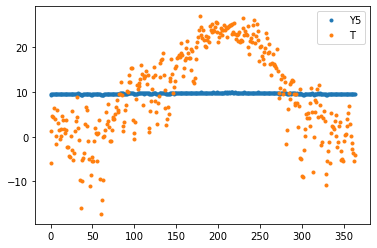

In [81]:
print('Model:1')

model1 = train(X, T, .1, 50, verbose=True)
Y1 = use(X, model1)
rmse1 = rmse(Y1,T)
print('rmse 1:', rmse1)

plt.plot(Y1[:365,:], '.', label='Y1')
plt.plot(T[:365,:], '.', label='T')
plt.legend()
plt.show()

'''
The plot fits very good but we can probably do better because
the learning_rate is large. With a learning_rate of .1 the 
lowest rmse that can be reached is 6.33. It doesn't matter how 
large the epoch gets either, it will remain at a constant rmse of
6.33. A large concentration of the predictions do line up with the 
target values, but we can do better than this. Meaning we can 
get a lower rmse than 6.33.
'''

print('\nModel:2')

model2 = train(X, T, 0.01, 10, verbose=True)
Y2 = use(X, model2)
rmse2 = rmse(Y2,T)
print('rmse 2:', rmse2)

plt.plot(Y2[:365,:], '.', label='Y2')
plt.plot(T[:365,:], '.', label='T')
plt.legend()
plt.show()

'''
The plot is at an extremely great fit. There is a high
concentration of predicted values in the target value area.
The epoch is at 10 because it doesn't need to get much 
bigger to produce the same constant of rmse 3.43. At an 
epoch of 10, rmse is at a constant of 3.43 and the same 
is true when epoch is at 100 & 1000 & so on. This leads me to 
believe there is likely a lower constant than 3.43 that we 
can manipulate the plot to be. With rmse being 3.43.
'''

print('\nModel:3')

model3 = train(X, T, 0.001, 50, verbose=True)
Y3 = use(X, model3)
rmse3 = rmse(Y3,T)
print('rmse 3:', rmse3)

plt.plot(Y3[:365,:], '.', label='Y3')
plt.plot(T[:365,:], '.', label='T')
plt.legend()
plt.show()

'''
From my investigation with the learning rate & epoch
manipulation, I found that the lowest rmse can be is 3.32. So 
because this is the lowest rmse value produced from all the 
models provided, it makes it the most successful model of them 
all. Again, the epoch does not need to be much higher than 50 
because the lowest rmse can be according to this model is 3.32
and an epoch of 50 already produces this.
'''

print('\nModel:4')

model4 = train(X, T, 0.00001, 50, verbose=True)
Y4 = use(X, model4)
rmse4 = rmse(Y4,T)
print('rmse 4:', rmse4)

plt.plot(Y4[:365,:], '.', label='Y4')
plt.plot(T[:365,:], '.', label='T')
plt.legend()
plt.show()

'''
This model is not very successful in having a large 
concentration of predicted values fall in the target area.
The reason for this is that the rmse is at 5.74. This is a
good illustration to compare model 3 with, so that you can 
see with your own eyes why the learning rate and epoch matter
when calculating this.
'''

print('\nModel:5')

model5 = train(X, T, 0.0000001, 100, verbose=True)
Y5 = use(X, model5)
rmse5 = rmse(Y5,T)
print('rmse 5:', rmse5)

'''
This model has the worst fit out of all the ones provided.
the rmse is at a 9.87, which is the highest out of all the
models which is why it is the worst model of all. I displayed
this model to show what the model should not look like. Do 
not use this model for any practical use.
'''

plt.plot(Y5[:365,:], '.', label='Y5')
plt.plot(T[:365,:], '.', label='T')
plt.legend()
plt.show()

models = [model1,model2,model3,model4,model5]


## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [85]:
num = 1
for _model in models:
    weights = pd.DataFrame(_model['w'][1:], index=Xnames, columns=['weights'])
    print('Model',num)
    print(weights)
    print('\n')
    num+=1

Model 1
        weights
tave  -0.084822
tmax  -0.075902
tmin  -0.087927
vp     1.511562
rhmax -0.083429
rhmin -0.128236
pp     0.011244
gust  -0.182101


Model 2
        weights
tave   0.247810
tmax   0.235719
tmin   0.248559
vp     0.308606
rhmax -0.024105
rhmin -0.054383
pp     0.051602
gust  -0.114585


Model 3
        weights
tave   0.247222
tmax   0.239278
tmin   0.243052
vp     0.234864
rhmax -0.028068
rhmin -0.042820
pp     0.027239
gust  -0.103043


Model 4
        weights
tave   0.120852
tmax   0.117574
tmin   0.118103
vp     0.115812
rhmax -0.012923
rhmin -0.049032
pp    -0.005196
gust   0.005414


Model 5
        weights
tave   0.003380
tmax   0.003299
tmin   0.003290
vp     0.003202
rhmax -0.000440
rhmin -0.001472
pp    -0.000212
gust   0.000319




## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [86]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Meng-Ravipati-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

cs445 Execution Grade is 60 / 60

 __ / 5 Reading in weather.data correctly.

 __ / 5 Count missi

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [ ]:
T = data[1:, 0:1] -  data[:-1, 0:1]

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.